In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_parquet('jane-street-real-time-market-data-forecasting/train.parquet/partition_id=6/part-0.parquet')

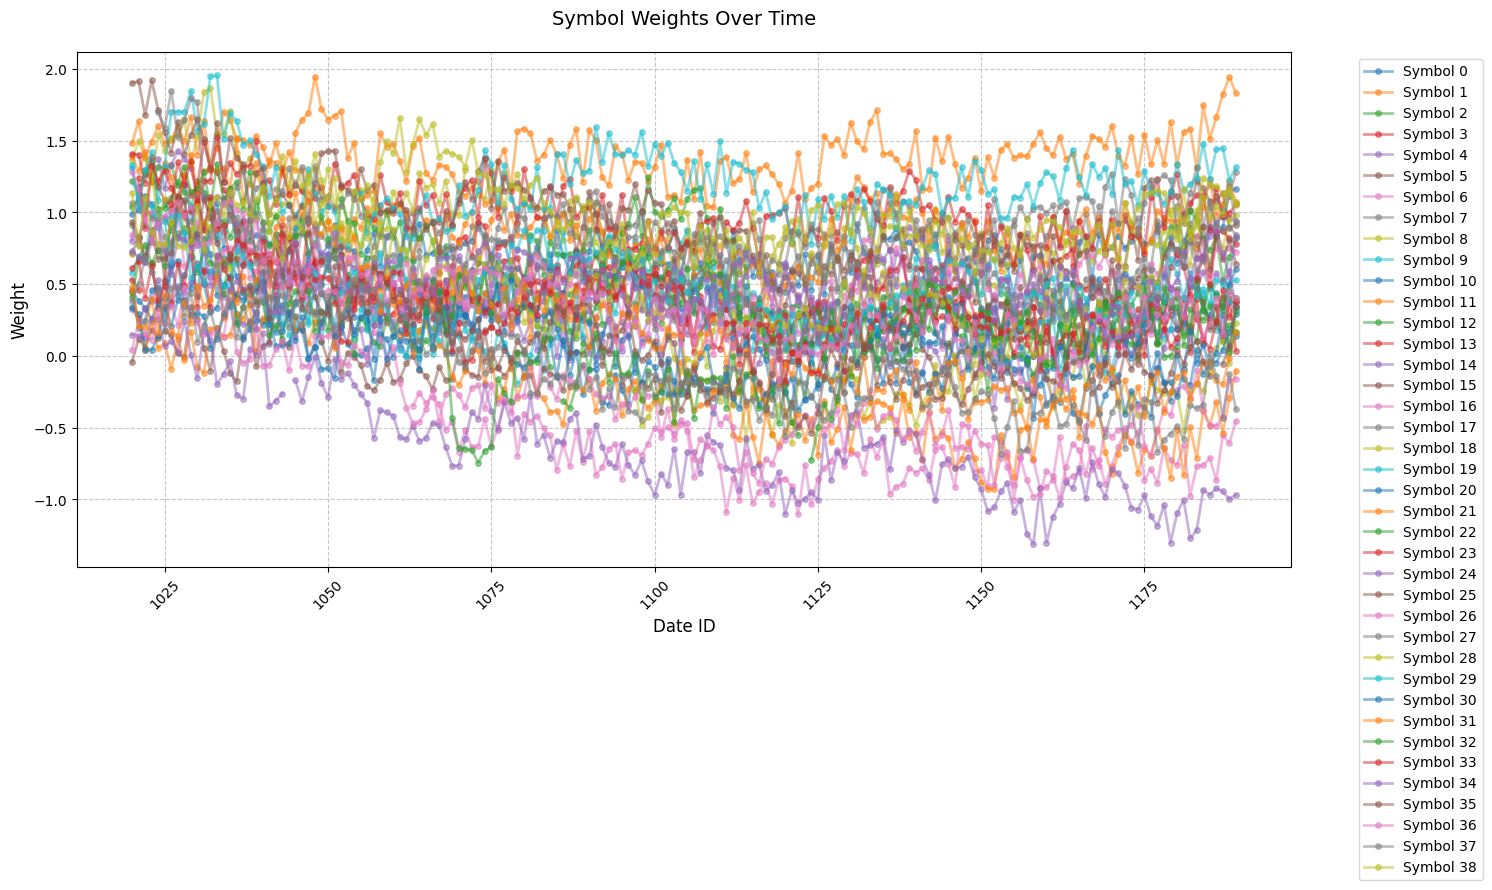

In [173]:
import matplotlib.pyplot as plt


visual_df = data[["symbol_id", "date_id", "weight"]].groupby(["date_id", "symbol_id"]).last()
visual_df['weight'] = np.log(visual_df['weight'])
pivot_df = visual_df.reset_index().pivot(index='date_id', columns='symbol_id', values='weight')

plt.figure(figsize=(15, 8))
    
    # 각 심볼별로 선 그래프 그리기
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], marker='o', label=f'Symbol {column}', linewidth=2, markersize=4, alpha=0.5)
    
# 그래프 꾸미기
plt.title('Symbol Weights Over Time', fontsize=14, pad=20)
plt.xlabel('Date ID', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
    
# x축 레이블 회전
plt.xticks(rotation=45)
    
# 레이아웃 조정
plt.tight_layout()


In [174]:
pivot_df

symbol_id,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
date_id,,,,,,,,,,,,,,,,,,,,,
1020,0.985771,1.483307,1.037347,0.531171,0.803210,0.717836,NaN,1.066920,1.366320,0.580390,...,1.306103,0.339632,0.478411,NaN,NaN,0.728369,0.935218,1.278825,0.379284,1.137699
1021,1.014582,1.634751,1.095426,0.457646,1.179283,0.825025,NaN,1.061814,1.499408,0.694441,...,1.109942,0.290226,0.205033,NaN,1.239854,0.687213,0.829649,1.165203,0.499678,0.765315
1022,1.114579,1.385164,1.293306,NaN,1.068053,0.653843,NaN,0.910929,1.378060,0.671383,...,1.049172,0.044405,0.199471,NaN,0.891682,0.654977,0.693372,0.946657,0.679986,1.100542
1023,1.055277,1.493147,1.207951,0.649072,NaN,0.875006,NaN,0.869067,1.213363,0.988152,...,1.042730,0.039573,0.399246,NaN,1.325173,0.795444,0.839936,0.809364,0.586343,0.865658
1024,0.993907,1.602609,1.318201,0.332120,1.371258,0.921870,NaN,0.737950,1.540039,0.953876,...,0.894785,0.138012,0.157284,NaN,1.216872,0.933190,0.677211,0.915571,0.454683,0.780427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.898699,1.512524,0.211504,0.262150,0.878976,1.078086,-0.711854,1.197003,0.630128,0.470614,...,0.363437,-0.073241,-0.044656,0.347328,0.050845,0.837940,-0.140608,0.221561,0.011797,1.192909
1186,0.844985,1.661677,0.341500,0.345689,0.930346,1.080689,-0.866316,1.116377,0.871073,0.182081,...,0.530083,0.021049,-0.170980,0.236244,0.240729,0.874286,NaN,0.402827,-0.137368,1.181937
1187,0.896297,1.823460,0.102254,0.143007,0.968805,1.132606,-0.551847,0.973887,0.752368,0.349867,...,0.497146,0.285376,-0.198739,0.410208,0.456122,0.715636,-0.053576,0.155622,-0.429611,1.125811


In [86]:
date_df = data.groupby(["date_id", "symbol_id"]).last()
date_weight_sum = np.log(data.groupby(["date_id", "symbol_id"]).last().weight).groupby("date_id").sum()
date_mean = data.groupby(["date_id"]).mean()

In [247]:
weight_feature_mean_df = pd.concat([date_mean.drop("weight", axis=1), date_weight_sum], axis=1)

weight_sum_df = weight_feature_mean_df.copy()

lag_range = 10
for x in range(-lag_range, lag_range):
    lag_df = weight_feature_mean_df.shift(x)
    lag_df.columns = weight_feature_mean_df.columns + f"_lag{x}"
    weight_sum_df = pd.concat([weight_sum_df, lag_df], axis=1)

In [248]:
abs(weight_sum_df[lag_range:-lag_range].corr().weight.sort_values()).sort_values().dropna().tail(50)

feature_31_lag-5     0.867766
feature_21_lag-5     0.868203
weight_lag-7         0.868484
feature_21_lag9      0.869940
feature_24_lag-9     0.871147
feature_21_lag8      0.878781
feature_31_lag7      0.879551
weight_lag-6         0.886349
feature_24_lag-10    0.886760
feature_31_lag6      0.887799
feature_21_lag7      0.888710
weight_lag9          0.889490
feature_31_lag-4     0.896300
feature_21_lag-4     0.896308
feature_31_lag5      0.897734
feature_21_lag6      0.899202
weight_lag8          0.900911
feature_31_lag4      0.905842
feature_21_lag5      0.907976
weight_lag-5         0.915572
feature_21_lag4      0.917270
weight_lag7          0.917964
feature_21_lag-3     0.920472
feature_31_lag-3     0.922406
feature_31_lag3      0.922850
weight_lag6          0.924525
feature_21_lag3      0.927338
feature_31_lag2      0.927893
weight_lag-4         0.932197
feature_31_lag-2     0.932868
feature_21_lag-2     0.934181
feature_21_lag2      0.934572
weight_lag5          0.938123
feature_31

/tmp/ipykernel_441093/1681374491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol0_df["weight"] = np.log(symbol0_df.loc[:, "weight"])


In [242]:
abs(symbol_0_weight_df.groupby(["date_id"]).mean().corr().feature_21).sort_values().dropna()

feature_32_lag12    0.000037
feature_28_lag9     0.000161
feature_01_lag3     0.000213
responder_0_lag8    0.000219
feature_01_lag8     0.000723
                      ...   
feature_21_lag1     0.725769
weight_lag1         0.732936
weight              0.735033
feature_31          0.795480
feature_21          1.000000
Name: feature_21, Length: 1204, dtype: float64

In [252]:
symbol0_df = data[data['symbol_id']==2]
symbol0_df["weight"] = np.log(symbol0_df.loc[:, "weight"])

symbol0_df_date_mean = symbol0_df.groupby(["date_id"]).mean()

symbol_0_weight_df = symbol0_df_date_mean.copy()

lag_range = 14
for x in range(1, lag_range):
    lag_df = symbol0_df_date_mean.shift(x)
    lag_df.columns = symbol0_df_date_mean.columns + f"_lag{x}"
    symbol_0_weight_df = pd.concat([symbol_0_weight_df, lag_df], axis=1)
    
abs(symbol_0_weight_df[25:].corr(method='spearman').weight.sort_values()).sort_values().dropna().tail(20)

/tmp/ipykernel_441093/3161491215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol0_df["weight"] = np.log(symbol0_df.loc[:, "weight"])


feature_17_lag4    0.702728
feature_24_lag1    0.703185
feature_15_lag2    0.705306
feature_17_lag2    0.705479
feature_16         0.706282
feature_15_lag3    0.706763
feature_63_lag4    0.707656
feature_63_lag3    0.707818
feature_17_lag3    0.708581
feature_17_lag1    0.709184
feature_64         0.709313
feature_15_lag1    0.710124
feature_64_lag2    0.711341
feature_24         0.711471
feature_15         0.712451
feature_17         0.714435
feature_64_lag4    0.718013
weight_lag1        0.721780
feature_64_lag3    0.723748
weight             1.000000
Name: weight, dtype: float64

In [ ]:
data.groupby("symbol_id").last()[["feature_09", "feature_10", "feature_11"]].sort_values(by="feature_09")

,feature_09,feature_10,feature_11
symbol_id,,,
5,2,10,171
19,4,3,11
3,4,3,11
28,9,3,25
15,9,3,25
35,11,7,76
33,11,7,76
16,11,7,76
9,11,7,76
